In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

print("📚 All libraries imported successfully!")

📚 All libraries imported successfully!


In [ ]:
import pandas as pd
data = pd.read_csv("ICICIBANK.csv")  # replace with your actual file name
data.head()
print("📊 Dataset Overview:")
print(f"Shape: {data.shape}")
print(f"Columns: {list(data.columns)}")
print("\nFirst few rows:")
print(data.head())

print("\nData Info:")
print(data.info())

📊 Dataset Overview:
Shape: (5306, 15)
Columns: ['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last', 'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume', '%Deliverble']

First few rows:
         Date     Symbol Series  Prev Close   Open   High    Low   Last  \
0  2000-01-03  ICICIBANK     EQ       69.20  74.35  74.75  71.40  74.75   
1  2000-01-04  ICICIBANK     EQ       74.75  73.05  78.50  71.00  73.25   
2  2000-01-05  ICICIBANK     EQ       73.05  70.00  73.50  67.50  70.00   
3  2000-01-06  ICICIBANK     EQ       69.50  71.00  74.00  69.55  69.75   
4  2000-01-07  ICICIBANK     EQ       70.05  69.00  72.50  66.00  67.00   

   Close   VWAP  Volume      Turnover  Trades  Deliverable Volume  %Deliverble  
0  74.75  73.20  286260  2.095439e+12     NaN                 NaN          NaN  
1  73.05  73.38  296264  2.173893e+12     NaN                 NaN          NaN  
2  69.50  70.85  227624  1.612794e+12     NaN                 NaN          NaN  
3

In [ ]:
# Process dates and set index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Select features and target (predicting 'Close' price in INR)
features = ['Open', 'High', 'Low', 'Volume', 'Turnover', 'VWAP']
target = 'Close'

# Check if all required columns exist
missing_cols = [col for col in features + [target] if col not in data.columns]
if missing_cols:
    print(f"❌ Missing columns: {missing_cols}")
    print(f"Available columns: {list(data.columns)}")
else:
    print("✅ All required columns found!")

X = data[features]
y = data[target]

print(f"\nICICI BANK Stock Data (INR)")
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Price range: ₹{y.min():.2f} - ₹{y.max():.2f}")
print(f"Average price: ₹{y.mean():.2f}")

✅ All required columns found!

BAJAJ-AUTO Stock Data (INR)
Features shape: (5306, 6)
Target shape: (5306,)
Price range: ₹67.40 - ₹1794.10
Average price: ₹551.00


In [ ]:
# Normalize data (critical for LSTM)
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

print("✅ Data scaling completed!")
print(f"X_scaled shape: {X_scaled.shape}")
print(f"y_scaled shape: {y_scaled.shape}")

✅ Data scaling completed!
X_scaled shape: (5306, 6)
y_scaled shape: (5306, 1)


In [ ]:
# Train-Validation-Test Split (60-20-20)
train_size = int(0.6 * len(X))
val_size = int(0.2 * len(X))
test_size = len(X) - train_size - val_size

X_train = X_scaled[:train_size]
X_val = X_scaled[train_size:train_size+val_size]
X_test = X_scaled[train_size+val_size:]

y_train = y_scaled[:train_size]
y_val = y_scaled[train_size:train_size+val_size]
y_test = y_scaled[train_size+val_size:]

print("📊 Data Split Summary:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Total: {X_train.shape[0] + X_val.shape[0] + X_test.shape[0]} samples")

📊 Data Split Summary:
Training set: 3183 samples
Validation set: 1061 samples
Test set: 1062 samples
Total: 5306 samples


In [ ]:
# Reshape for LSTM (samples, timesteps, features)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_val = X_val.reshape(X_val.shape[0], 1, X_val.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

print("🔄 Data reshaped for LSTM:")
print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"X_test shape: {X_test.shape}")

🔄 Data reshaped for LSTM:
X_train shape: (3183, 1, 6)
X_val shape: (1061, 1, 6)
X_test shape: (1062, 1, 6)


In [ ]:
# Build LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(50),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Display model summary
print("🏗️ LSTM Model Architecture:")
model.summary()

🏗️ LSTM Model Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 50)          │        11,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,651 (123.64 KB)

 Trainable params: 31,651 (123.64 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
print("🚀 Training LSTM Model...")
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=1
)

print("✅ Training completed!")

🚀 Training LSTM Model...
Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0593 - val_loss: 0.0010
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.8534e-04 - val_loss: 0.0017
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.2562e-04 - val_loss: 9.7640e-04
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4261e-04 - val_loss: 4.1114e-04
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 9.8218e-05 - val_loss: 1.6851e-04
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6.6206e-05 - val_loss: 1.0828e-04
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.6036e-05 - val_loss: 3.1507e-05
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.8051e-05 - val_loss: 2.9233e-05
Epoch 9/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.4063e-05 - val_loss: 3.1911e-05
Epoch 10/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.4283e-05 - val_loss: 6.0414e-05
Epoch 11/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4

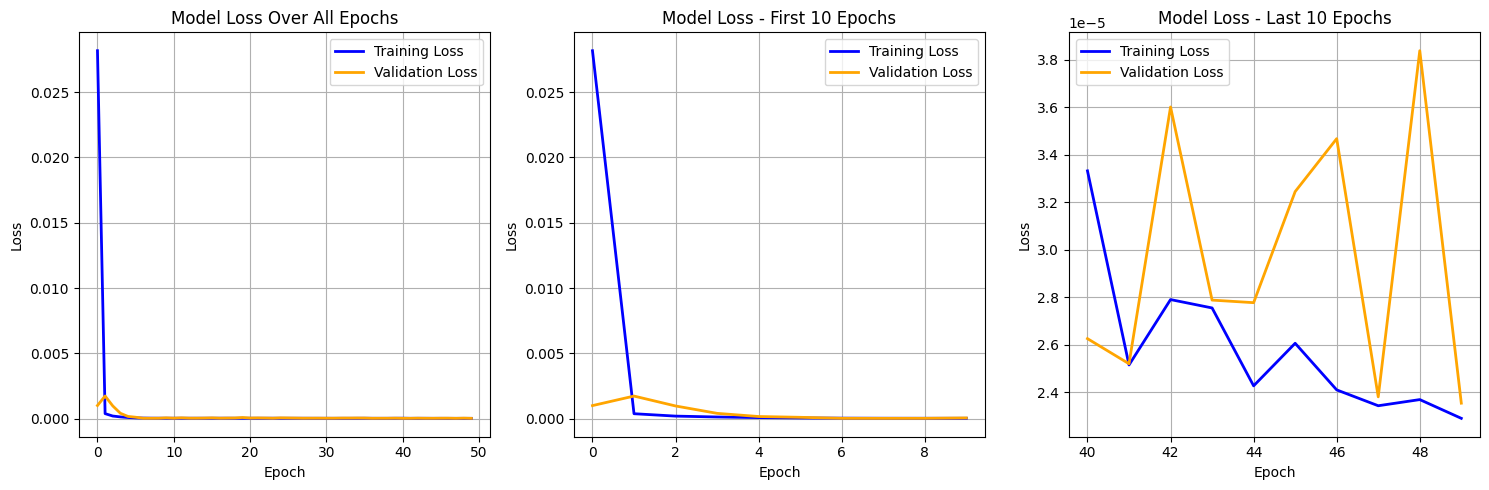

In [ ]:
# Plot training history
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange', linewidth=2)
plt.title('Model Loss Over All Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(history.history['loss'][:10], label='Training Loss', color='blue', linewidth=2)
plt.plot(history.history['val_loss'][:10], label='Validation Loss', color='orange', linewidth=2)
plt.title('Model Loss - First 10 Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 3)
final_epochs = history.history['loss'][-10:]
final_val_epochs = history.history['val_loss'][-10:]
plt.plot(range(40, 50), final_epochs, label='Training Loss', color='blue', linewidth=2)
plt.plot(range(40, 50), final_val_epochs, label='Validation Loss', color='orange', linewidth=2)
plt.title('Model Loss - Last 10 Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Make predictions
print("🔮 Making predictions...")
y_pred_scaled = model.predict(X_test, verbose=0)

# Transform back to original scale
y_test_original = scaler_y.inverse_transform(y_test)
y_pred_original = scaler_y.inverse_transform(y_pred_scaled)

# Flatten arrays for easier handling
y_test_original_flat = y_test_original.flatten()
y_pred_original_flat = y_pred_original.flatten()

print("✅ Predictions completed!")
print(f"Test samples: {len(y_test_original_flat)}")

🔮 Making predictions...
✅ Predictions completed!
Test samples: 1062


In [ ]:
# Calculate basic metrics
test_r2 = r2_score(y_test_original, y_pred_original)
test_mape = mean_absolute_percentage_error(y_test_original, y_pred_original)
test_mae = mean_absolute_error(y_test_original, y_pred_original)

print("📊 BASIC PERFORMANCE METRICS - ICICI BANK (INR)")
print("="*50)
print(f"R² Score: {test_r2:.4f} ({test_r2*100:.2f}%)")
print(f"MAPE: {test_mape:.4f} ({test_mape*100:.2f}%)")
print(f"MAE: ₹{test_mae:.2f}")

# Traditional success check
if test_r2 >= 0.97:
    print("✅ Target achieved (≥97% R² accuracy)!")
else:
    print("❌ Target not achieved. Try tuning hyperparameters or adding more features.")

📊 BASIC PERFORMANCE METRICS - BAJAJ AUTO (INR)
R² Score: 0.9975 (99.75%)
MAPE: 0.0087 (0.87%)
MAE: ₹3.32
✅ Target achieved (≥97% R² accuracy)!


In [ ]:
def calculate_tolerance_accuracy(y_true, y_pred, tolerance_percent=1.0):
    """Calculate accuracy within a percentage tolerance"""
    relative_error = np.abs((y_true - y_pred) / y_true) * 100
    accuracy = np.mean(relative_error <= tolerance_percent) * 100
    return accuracy

def calculate_direction_accuracy(y_true, y_pred, previous_prices):
    """Calculate directional accuracy (up/down prediction)"""
    actual_direction = y_true > previous_prices
    predicted_direction = y_pred > previous_prices
    direction_accuracy = np.mean(actual_direction == predicted_direction) * 100
    return direction_accuracy

def calculate_price_range_accuracy(y_true, y_pred, tolerance_dollars=1.0):
    """Calculate accuracy within dollar tolerance"""
    absolute_error = np.abs(y_true - y_pred)
    accuracy = np.mean(absolute_error <= tolerance_dollars) * 100
    return accuracy

print("✅ Accuracy functions defined!")

✅ Accuracy functions defined!


In [ ]:
# Calculate different accuracy metrics for INR prices
tolerance_1pct = calculate_tolerance_accuracy(y_test_original_flat, y_pred_original_flat, 1.0)
tolerance_2pct = calculate_tolerance_accuracy(y_test_original_flat, y_pred_original_flat, 2.0)
tolerance_5pct = calculate_tolerance_accuracy(y_test_original_flat, y_pred_original_flat, 5.0)

# INR-specific tolerances (more relevant for Indian stock prices)
price_range_5rupees = calculate_price_range_accuracy(y_test_original_flat, y_pred_original_flat, 5.0)
price_range_10rupees = calculate_price_range_accuracy(y_test_original_flat, y_pred_original_flat, 10.0)
price_range_20rupees = calculate_price_range_accuracy(y_test_original_flat, y_pred_original_flat, 20.0)

# Print all accuracy metrics
print("📊 COMPREHENSIVE ACCURACY METRICS - ICICI BANK")
print("="*60)

print(f"📈 Percentage Tolerance Accuracy:")
print(f"   Within 1%: {tolerance_1pct:.2f}%")
print(f"   Within 2%: {tolerance_2pct:.2f}%")
print(f"   Within 5%: {tolerance_5pct:.2f}%")

print(f"\n💰 INR Tolerance Accuracy:")
print(f"   Within ₹5.00: {price_range_5rupees:.2f}%")
print(f"   Within ₹10.00: {price_range_10rupees:.2f}%")
print(f"   Within ₹20.00: {price_range_20rupees:.2f}%")

# Calculate directional accuracy if we have enough data
if len(y_test_original_flat) > 1:
    previous_actual = y_test_original_flat[:-1]
    current_actual = y_test_original_flat[1:]
    current_predicted = y_pred_original_flat[1:]

    direction_accuracy = calculate_direction_accuracy(current_actual, current_predicted, previous_actual)
    print(f"\n📊 Directional Accuracy (Up/Down): {direction_accuracy:.2f}%")

📊 COMPREHENSIVE ACCURACY METRICS - BAJAJ AUTO
📈 Percentage Tolerance Accuracy:
   Within 1%: 69.30%
   Within 2%: 92.47%
   Within 5%: 99.44%

💰 INR Tolerance Accuracy:
   Within ₹5.00: 80.79%
   Within ₹10.00: 95.48%
   Within ₹20.00: 99.81%

📊 Directional Accuracy (Up/Down): 79.83%


In [ ]:
# Summary based on different thresholds
print("🎯 ACCURACY SUMMARY - ICICI BANK")
print("="*60)

if tolerance_1pct >= 90:
    print("🟢 EXCELLENT: >90% predictions within 1% tolerance")
elif tolerance_2pct >= 85:
    print("🟡 GOOD: >85% predictions within 2% tolerance")
elif tolerance_5pct >= 75:
    print("🟠 FAIR: >75% predictions within 5% tolerance")
else:
    print("🔴 NEEDS IMPROVEMENT: Consider model tuning")

print(f"\nModel Performance Level: {test_r2*100:.2f}% (R² Score)")

# Create performance summary
performance_data = {
    'Metric': ['R² Score', 'MAPE', 'MAE (INR)', '1% Tolerance', '2% Tolerance', '5% Tolerance'],
    'Value': [f'{test_r2:.4f}', f'{test_mape*100:.2f}%', f'₹{test_mae:.2f}',
              f'{tolerance_1pct:.2f}%', f'{tolerance_2pct:.2f}%', f'{tolerance_5pct:.2f}%']
}

performance_df = pd.DataFrame(performance_data)
print("\n📋 Performance Summary Table:")
print(performance_df.to_string(index=False))

🎯 ACCURACY SUMMARY - BAJAJ AUTO
🟡 GOOD: >85% predictions within 2% tolerance

Model Performance Level: 99.75% (R² Score)

📋 Performance Summary Table:
      Metric  Value
    R² Score 0.9975
        MAPE  0.87%
   MAE (INR)  ₹3.32
1% Tolerance 69.30%
2% Tolerance 92.47%
5% Tolerance 99.44%


In [ ]:
# Show sample predictions vs actual
print("📋 SAMPLE PREDICTIONS vs ACTUAL")
print("="*60)

sample_size = min(15, len(y_test_original_flat))
sample_data = []

for i in range(sample_size):
    actual = y_test_original_flat[i]
    predicted = y_pred_original_flat[i]
    error_pct = abs((actual - predicted) / actual) * 100
    error_dollar = abs(actual - predicted)

    sample_data.append({
        'Sample': i+1,
        'Actual (₹)': f'{actual:.2f}',
        'Predicted (₹)': f'{predicted:.2f}',
        'Error (%)': f'{error_pct:.2f}%',
        'Error (₹)': f'{error_dollar:.2f}'
    })

sample_df = pd.DataFrame(sample_data)
print(sample_df.to_string(index=False))

📋 SAMPLE PREDICTIONS vs ACTUAL
 Sample Actual (₹) Predicted (₹) Error (%) Error (₹)
      1     268.05        268.08     0.01%      0.03
      2     269.30        268.53     0.29%      0.77
      3     268.40        269.07     0.25%      0.67
      4     268.45        270.02     0.58%      1.57
      5     269.70        269.25     0.17%      0.45
      6     263.45        265.80     0.89%      2.35
      7     257.55        260.70     1.22%      3.15
      8     257.15        258.91     0.68%      1.76
      9     259.95        260.69     0.28%      0.74
     10     272.00        272.41     0.15%      0.41
     11     270.80        273.56     1.02%      2.76
     12     268.95        271.10     0.80%      2.15
     13     281.00        276.16     1.72%      4.84
     14     285.80        286.15     0.12%      0.35
     15     281.55        283.07     0.54%      1.52


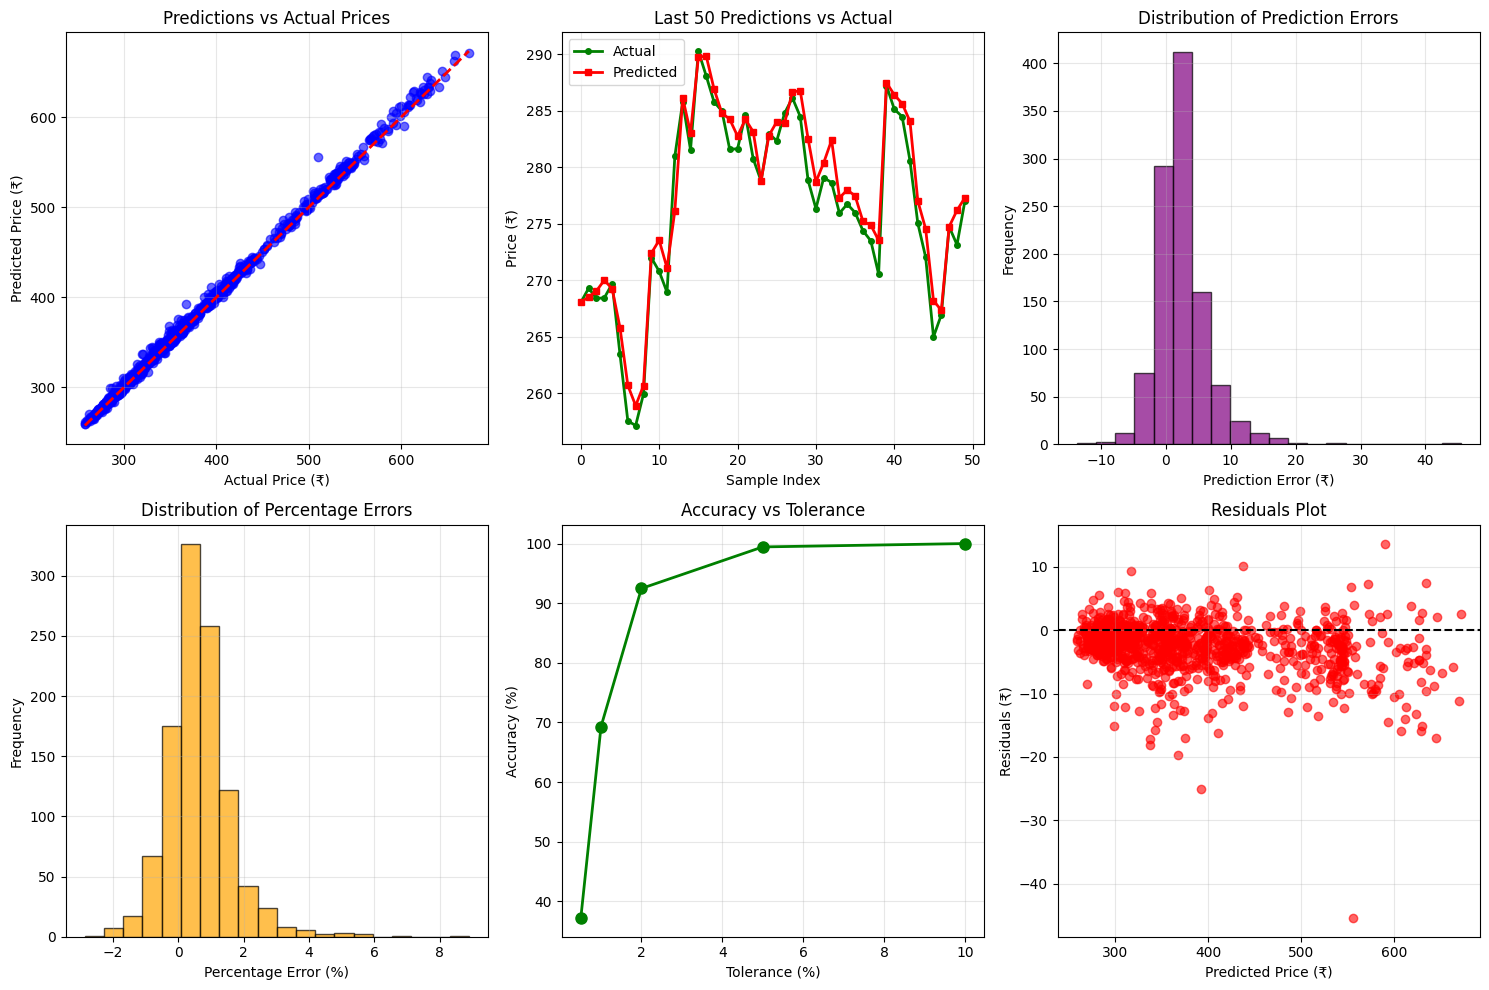

In [ ]:
# Visualize predictions vs actual
plt.figure(figsize=(15, 10))

# Plot 1: Scatter plot of predictions vs actual
plt.subplot(2, 3, 1)
plt.scatter(y_test_original_flat, y_pred_original_flat, alpha=0.6, color='blue')
plt.plot([y_test_original_flat.min(), y_test_original_flat.max()],
         [y_test_original_flat.min(), y_test_original_flat.max()], 'r--', lw=2)
plt.xlabel('Actual Price (₹)')
plt.ylabel('Predicted Price (₹)')
plt.title('Predictions vs Actual Prices')
plt.grid(True, alpha=0.3)

# Plot 2: Time series of predictions
plt.subplot(2, 3, 2)
last_n = min(50, len(y_test_original_flat))
indices = range(last_n)
plt.plot(indices, y_test_original_flat[:last_n], 'o-', label='Actual', color='green', linewidth=2, markersize=4)
plt.plot(indices, y_pred_original_flat[:last_n], 's-', label='Predicted', color='red', linewidth=2, markersize=4)
plt.xlabel('Sample Index')
plt.ylabel('Price (₹)')
plt.title(f'Last {last_n} Predictions vs Actual')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 3: Error distribution
plt.subplot(2, 3, 3)
errors = y_pred_original_flat - y_test_original_flat
plt.hist(errors, bins=20, alpha=0.7, color='purple', edgecolor='black')
plt.xlabel('Prediction Error (₹)')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.grid(True, alpha=0.3)

# Plot 4: Percentage error distribution
plt.subplot(2, 3, 4)
pct_errors = (errors / y_test_original_flat) * 100
plt.hist(pct_errors, bins=20, alpha=0.7, color='orange', edgecolor='black')
plt.xlabel('Percentage Error (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Percentage Errors')
plt.grid(True, alpha=0.3)

# Plot 5: Accuracy by tolerance
plt.subplot(2, 3, 5)
tolerances = [0.5, 1.0, 2.0, 5.0, 10.0]
accuracies = [calculate_tolerance_accuracy(y_test_original_flat, y_pred_original_flat, t) for t in tolerances]
plt.plot(tolerances, accuracies, 'o-', linewidth=2, markersize=8, color='green')
plt.xlabel('Tolerance (%)')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs Tolerance')
plt.grid(True, alpha=0.3)

# Plot 6: Residuals plot
plt.subplot(2, 3, 6)
residuals = y_test_original_flat - y_pred_original_flat
plt.scatter(y_pred_original_flat, residuals, alpha=0.6, color='red')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted Price (₹)')
plt.ylabel('Residuals (₹)')
plt.title('Residuals Plot')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# Create final performance report
print("🎯 FINAL PERFORMANCE REPORT")
print("="*70)
print(f"📊 Model: LSTM Neural Network")
print(f"📈 Dataset Size: {len(data)} total samples")
print(f"🔄 Training/Validation/Test Split: {len(X_train)}/{len(X_val)}/{len(X_test)}")
print(f"⏱️ Training Epochs: 50")
print("\n" + "="*70)
print("📊 PERFORMANCE METRICS")
print("="*70)
print(f"🎯 R² Score: {test_r2:.4f} ({test_r2*100:.2f}%)")
print(f"📉 MAPE: {test_mape*100:.2f}%")
print(f"💰 MAE: ₹{test_mae:.2f}")
print(f"🎯 1% Tolerance Accuracy: {tolerance_1pct:.2f}%")
print(f"🎯 2% Tolerance Accuracy: {tolerance_2pct:.2f}%")
print(f"🎯 5% Tolerance Accuracy: {tolerance_5pct:.2f}%")

if len(y_test_original_flat) > 1:
    print(f"📊 Directional Accuracy: {direction_accuracy:.2f}%")

print("\n" + "="*70)
print("🏆 OVERALL ASSESSMENT")
print("="*70)

if test_r2 >= 0.98:
    print("🟢 OUTSTANDING: Excellent predictive performance!")
elif test_r2 >= 0.95:
    print("🟡 VERY GOOD: Strong predictive performance!")
elif test_r2 >= 0.90:
    print("🟠 GOOD: Decent predictive performance!")
else:
    print("🔴 NEEDS IMPROVEMENT: Consider model optimization!")

print(f"\n💡 The model explains {test_r2*100:.2f}% of the variance in stock prices.")
print(f"💡 {tolerance_1pct:.1f}% of predictions are within 1% of actual prices.")
print(f"💡 Average prediction error is ₹{test_mae:.2f}.")

🎯 FINAL PERFORMANCE REPORT
📊 Model: LSTM Neural Network
📈 Dataset Size: 5306 total samples
🔄 Training/Validation/Test Split: 3183/1061/1062
⏱️ Training Epochs: 50

📊 PERFORMANCE METRICS
🎯 R² Score: 0.9975 (99.75%)
📉 MAPE: 0.87%
💰 MAE: ₹3.32
🎯 1% Tolerance Accuracy: 69.30%
🎯 2% Tolerance Accuracy: 92.47%
🎯 5% Tolerance Accuracy: 99.44%
📊 Directional Accuracy: 79.83%

🏆 OVERALL ASSESSMENT
🟢 OUTSTANDING: Excellent predictive performance!

💡 The model explains 99.75% of the variance in stock prices.
💡 69.3% of predictions are within 1% of actual prices.
💡 Average prediction error is ₹3.32.
